# Question No.1. Vision Dataset

CIFAR-10-It dataset consists of 60000 32x32 colour images in 10 classes. Please find your dataset from the link-https://www.tensorflow.org/datasets/catalog/cifar10

## 1. Import Libraries/Dataset(0 mark)

In [1]:
import os
seed=21
os.environ['PYTHONHASHSEED']=str(seed)

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
import pandas as pd
import itertools
import copy
import time


In [2]:
def reset_random_seeds(seed_val):
    os.environ['PYTHONHASHSEED']=str(seed_val)
    tf.random.set_seed(seed_val)
    np.random.seed(seed_val)

In [3]:
reset_random_seeds(seed)

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
num_classes = 10
print(num_classes)



170500096/170498071 [==============================] - 2s 0us/step
10


In [5]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)

## 2. Data Visualization and augmentation(1 mark)

### a. Plot at least two samples from each class of the dataset (use matplotlib/seaborn/any other library).

In [6]:
def display_image(sample_image):
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

    plt.figure(figsize=(5,20))
    # fig, ax = plt.subplots(nrows=10, ncols=2)
    j=1
    for key, value in sample_image.items():
        for i in range(len(value)):
            plt.subplot(10, len(value), j)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(value[i]/255, cmap=plt.cm.binary)
            plt.xlabel(class_names[key])
            j+=1
    plt.show()

In [7]:
sample_image = {}

for image, label in zip(X_train, y_train):
    if label[0] in sample_image.keys() and len(sample_image[label[0]])<2:
        sample_image[label[0]].append(image)
    elif label[0] not in sample_image.keys():
        sample_image[label[0]] = [image]
    

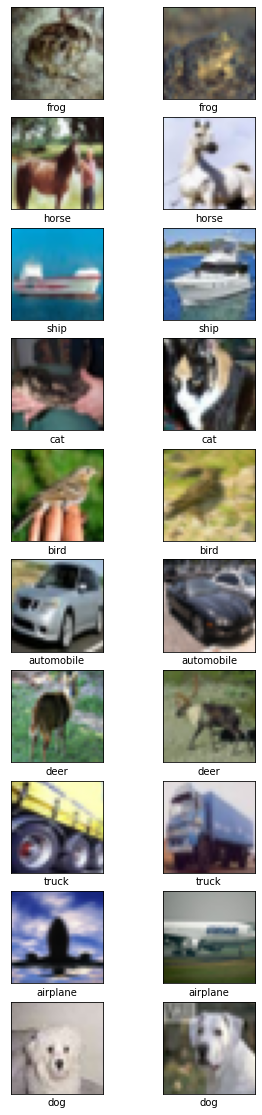

In [8]:
display_image(sample_image)

### b. Apply horizontal flip and width shift augmentation (horizontal_flip, width_shift_range) to the dataset separately. Print the augmented image and the original image for each class and each augmentation.

In [9]:
width_shift_range_gen = ImageDataGenerator(
    width_shift_range=0.2
)

In [10]:
horizontal_flip_gen = ImageDataGenerator(
    horizontal_flip=True
)

In [11]:
width_shift_range_gen.fit(X_train)
horizontal_flip_gen.fit(X_train)

In [12]:
def get_aug_img(image, gen):
    return next(gen.flow(np.array([image])))[0]
    

##############################################
      wide_shift_tange augmentation           
##############################################


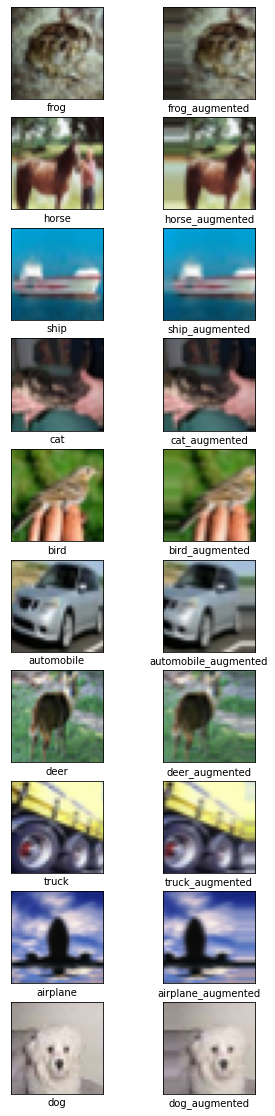

In [13]:
print("##############################################")
print("      wide_shift_tange augmentation           ")
print("##############################################")

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(5,20))
# fig, ax = plt.subplots(nrows=10, ncols=2)
j=1
for key, value in sample_image.items():
    value[1] = get_aug_img(value[0], width_shift_range_gen)
    for i in range(len(value)):
        plt.subplot(10, len(value), j)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(value[i]/255, cmap=plt.cm.binary)
        if j%2==1:
            plt.xlabel(class_names[key])
        else:
            plt.xlabel(class_names[key]+'_augmented')
        j+=1
plt.show()
      
    

##############################################
      Horizontal Flip augmentation           
##############################################


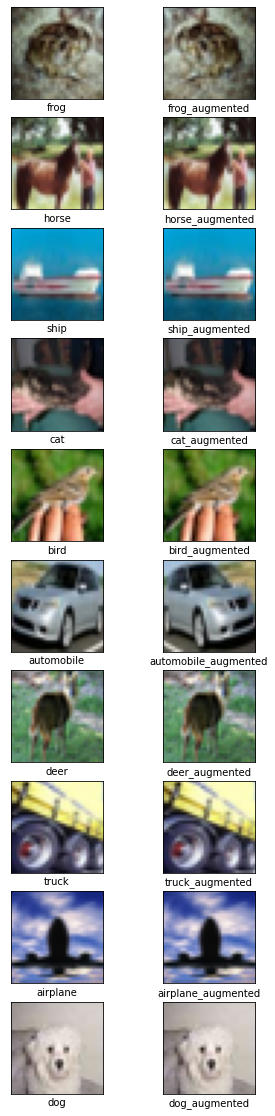

In [14]:
print("##############################################")
print("      Horizontal Flip augmentation           ")
print("##############################################")

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(5,20))
# fig, ax = plt.subplots(nrows=10, ncols=2)
j=1
for key, value in sample_image.items():
    value[1] = get_aug_img(value[0], horizontal_flip_gen)
    for i in range(len(value)):
        plt.subplot(10, len(value), j)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(value[i]/255, cmap=plt.cm.binary)
        if j%2==1:
            plt.xlabel(class_names[key])
        else:
            plt.xlabel(class_names[key]+'_augmented')
        j+=1
plt.show()
      
    

In [15]:
generator = ImageDataGenerator(
    width_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255
)

In [16]:
generator.fit(X_train)

### c. Bring the train and test data in the required format.

In [17]:
y_train = utils.to_categorical(y_train, num_classes)
y_valid = utils.to_categorical(y_valid, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

### d. Print the shapes of train and test data.

In [18]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

X_train shape:  (40000, 32, 32, 3)
y_train shape:  (40000, 10)


In [19]:
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_train.shape)

X_test shape:  (10000, 32, 32, 3)
y_test shape:  (40000, 10)


## 3. Model Building(0.2*5 = 1 mark)

<ol>
<li>Sequential Model layers-Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.</li>
<li>Add L2 regularization to all the layers.</li>
<li>Add one layer of dropout at the appropriate position and give reasons.</li>
<li>Choose the appropriate activation function for all the layers.</li>
<li>Print the model summary.</li>
</ol>

In [30]:
epochs = 30
nodes_per_layer = [512,256,128,64,32,16]
layers = []
batch_size = 64
dropout_rate = 0.3
num_classes = 10

In [31]:
layers.append(tf.keras.layers.Flatten(input_shape=(32,32,3)))
for nodes in nodes_per_layer:
    layers.append(tf.keras.layers.Dense(nodes, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(l=0.0001))) # Using l2 regularization kernel_regularizer=tf.keras.regularizers.l2(l=0.0001)
layers.append(tf.keras.layers.Dropout(dropout_rate))
layers.append(tf.keras.layers.Dense(10, activation=tf.keras.activations.linear, kernel_regularizer=tf.keras.regularizers.l2(l=0.0001)))
layers.append(tf.keras.layers.Softmax())
model = tf.keras.Sequential(layers)

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_17 (Dense)             (None, 16)               

## 4. Model Compilation(0.25 mark)
<ol>
<li>Compile the model with the appropriate loss function.</li>
<li>Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.</li>
<li>Use accuracy as a metric.</li>
</ol>

In [33]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## 5. Model Training(0.5 + 0.25 = 0.75 mark)

### 1. Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.

In [34]:
start_time = time.time()
train_gen = generator.flow(X_train, y_train, batch_size=batch_size, shuffle=False)
valid_gen = generator.flow(X_valid, y_valid, batch_size=batch_size, shuffle=False)
overfitting_hist = model.fit(train_gen,epochs=100,validation_data=valid_gen, callbacks=[callback])
end_time = time.time()

Epoch 1/100
625/625 [==============================] - 21s 32ms/step - loss: 2.2981 - accuracy: 0.1519 - val_loss: 2.0440 - val_accuracy: 0.2529
Epoch 2/100
625/625 [==============================] - 20s 31ms/step - loss: 2.0462 - accuracy: 0.2536 - val_loss: 1.9125 - val_accuracy: 0.3267
Epoch 3/100
625/625 [==============================] - 20s 31ms/step - loss: 1.9470 - accuracy: 0.3019 - val_loss: 1.8362 - val_accuracy: 0.3494
Epoch 4/100
625/625 [==============================] - 20s 32ms/step - loss: 1.8907 - accuracy: 0.3263 - val_loss: 1.7817 - val_accuracy: 0.3747
Epoch 5/100
625/625 [==============================] - 20s 31ms/step - loss: 1.8598 - accuracy: 0.3399 - val_loss: 1.7879 - val_accuracy: 0.3673
Epoch 6/100
625/625 [==============================] - 20s 31ms/step - loss: 1.8285 - accuracy: 0.3534 - val_loss: 1.7373 - val_accuracy: 0.3914
Epoch 7/100
625/625 [==============================] - 19s 31ms/step - loss: 1.8050 - accuracy: 0.3618 - val_loss: 1.7110 - val_ac

### 2. Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training

Text(0, 0.5, 'accuracy')

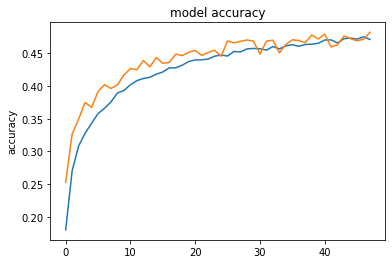

In [35]:
plt.plot(overfitting_hist.history['accuracy'])
plt.plot(overfitting_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

In [36]:
print("The total time taken for training: {}s".format(round(end_time - start_time, 2)))

The total time taken for training: 952.33s


## 6. Model Evaluation(0.5 + 0.5 = 1 mark)

### a. Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.

In [37]:
train_predicted = model.predict(train_gen)
valid_predicted = model.predict(valid_gen)

In [38]:
train_predicted_cls = np.argmax(train_predicted,axis=1)
valid_predicted_cls = np.argmax(valid_predicted, axis=1) 

In [39]:
train_actual_cls = np.argmax(y_train, axis=1)
valid_actual_cls = np.argmax(y_valid, axis=1)

In [40]:
print("Train Accuracy: {}%".format(accuracy_score(train_actual_cls, train_predicted_cls)))
print("Validation Accuracy: {}%".format(accuracy_score(valid_actual_cls, valid_predicted_cls)))

Train Accuracy: 0.50495%
Validation Accuracy: 0.4842%


In [41]:
cfm = confusion_matrix(valid_actual_cls, valid_predicted_cls)

In [42]:
df_cm = pd.DataFrame(cfm, index = class_names, columns=class_names)

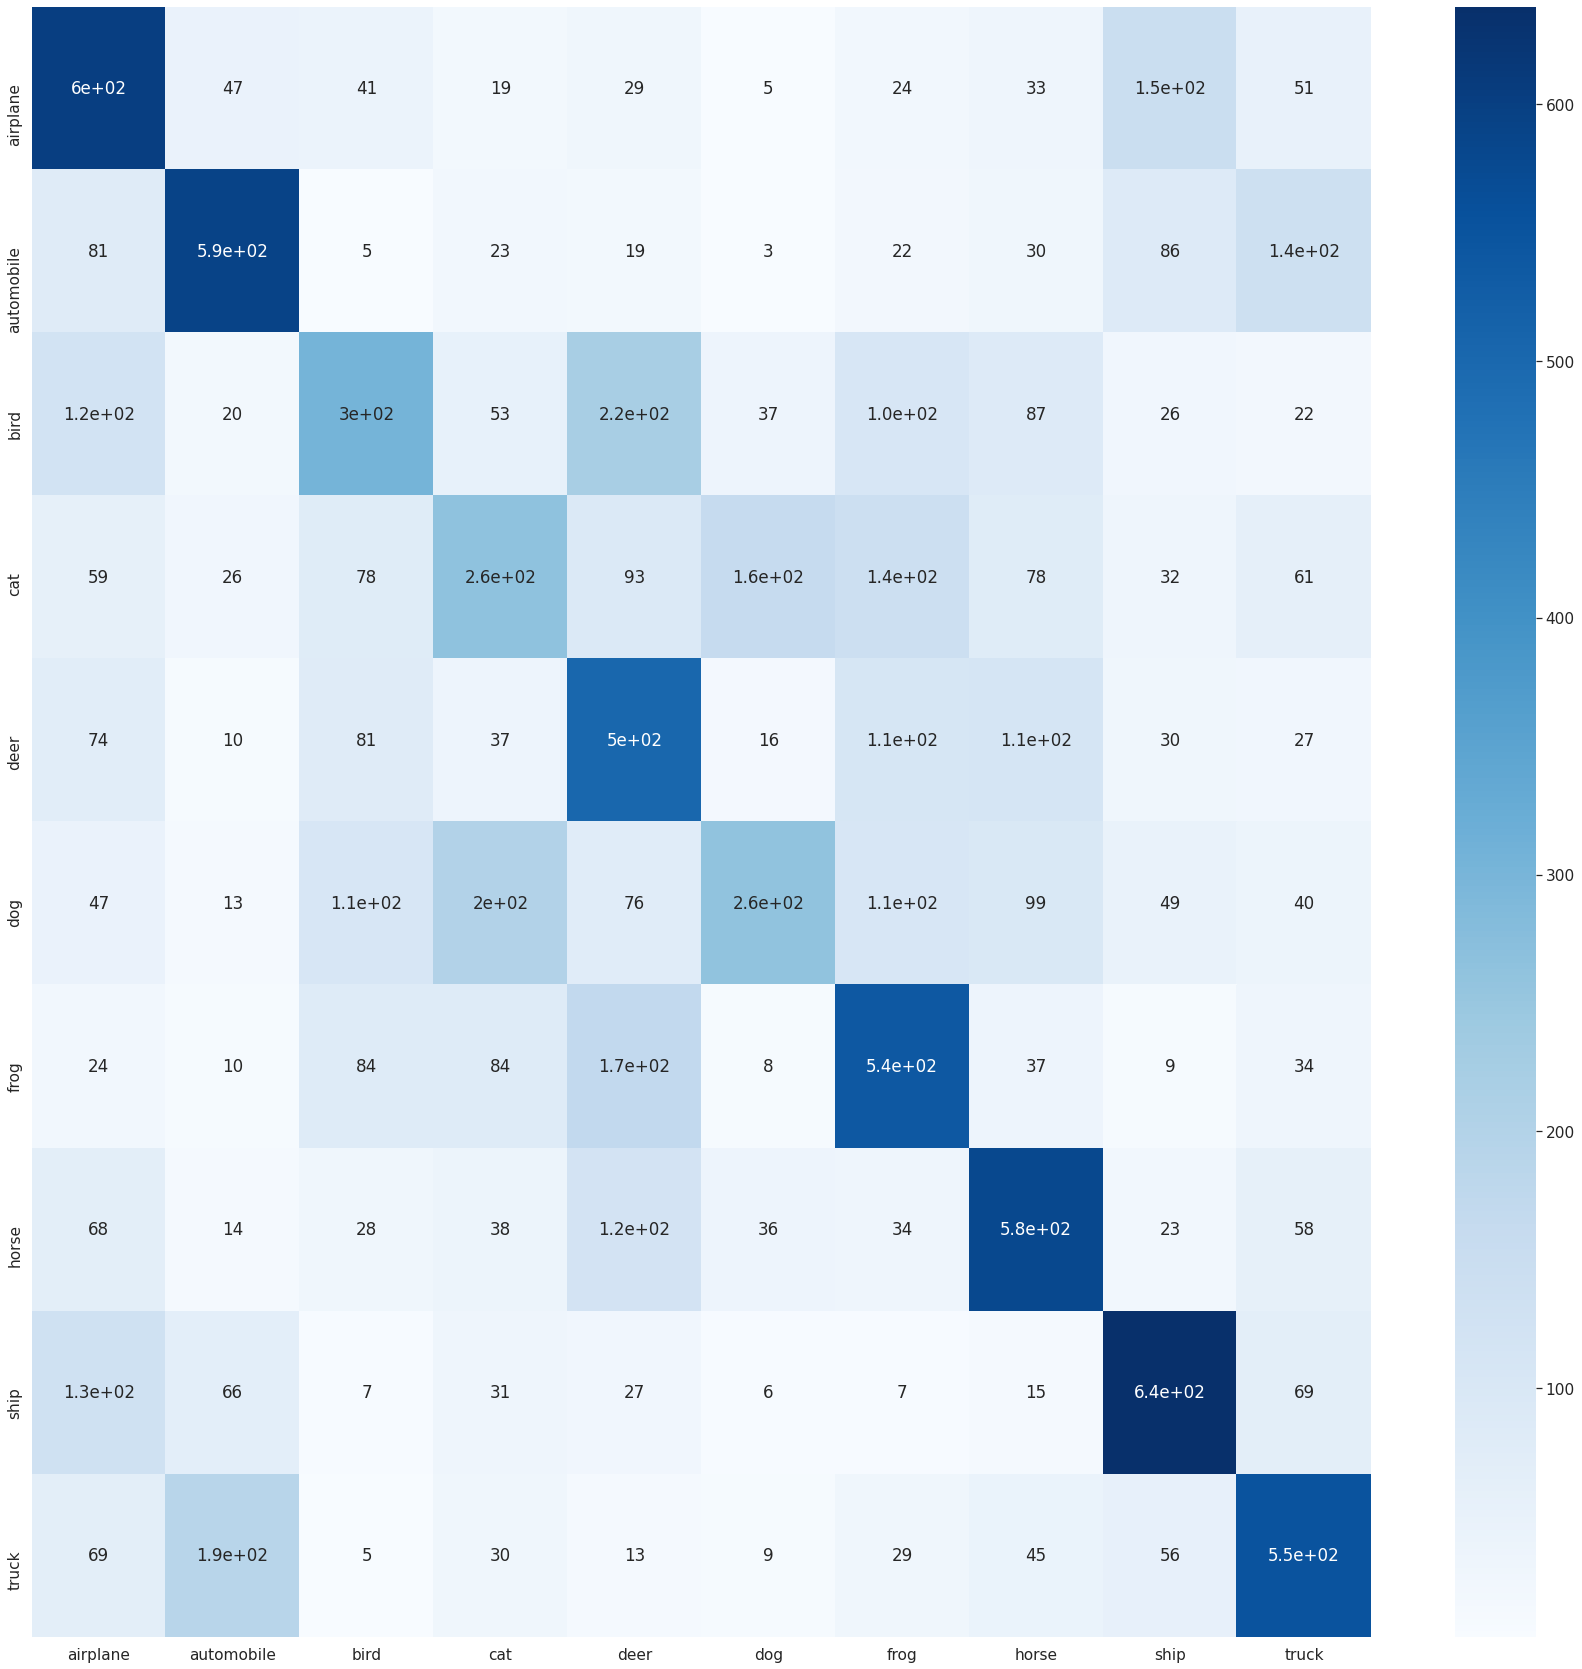

In [43]:
plt.figure(figsize=(30,30))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, cmap=plt.get_cmap('Blues')) # font size

plt.show()

Analysis of the heatmap

### b. Print the two most incorrectly classified images for each class in the test dataset.

In [44]:
test_gen = generator.flow(X_test, y_test, batch_size=batch_size, shuffle=False)
test_predicted = model.predict(test_gen)
test_actual_cls = np.argmax(y_test, axis=1)

In [45]:
def find_2_smallest_index(arr):
    first = 999
    second = 999
    first_index=0
    sexond_index=0
    for i in range(len(arr)):
        if arr[i] < first:
            second = copy.deepcopy(first)
            second_index = copy.deepcopy(first_index)
            first = copy.deepcopy(arr[i])
            first_index = copy.deepcopy(i)
        elif (arr[i] < second):
            second = copy.deepcopy(arr[i])
            second_index = copy.deepcopy(i)
    return first_index, second_index
            

In [46]:
worst_2 = {}
for i in range(10):
    first_index, second_index = find_2_smallest_index(test_predicted[:,i])
    worst_2[i] = [X_test[first_index],X_test[second_index]]

#########################################################
  Printing top 2 worst classified images of each class   
#########################################################


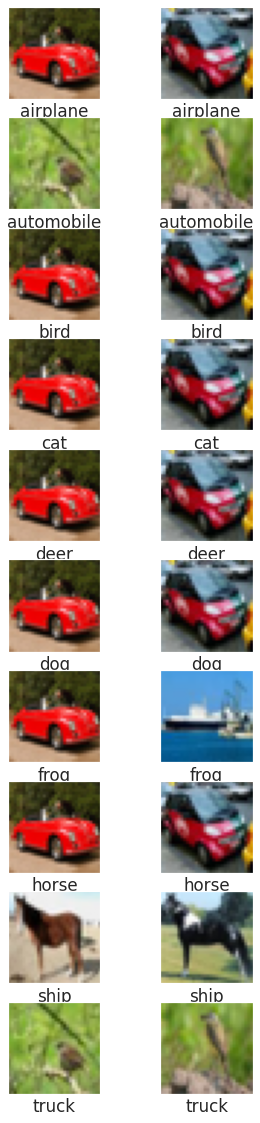

In [47]:
print("#########################################################")
print("  Printing top 2 worst classified images of each class   ")
print("#########################################################")

display_image(worst_2)

# Hyperparameter Tuning 
Build two more additional models by changing the following hyperparameters ONE at a time. Write the code for Model Building, Model Compilation, Model Training and Model Evaluation as given in the instructions above for each additional model. <strong>(1 + 1 = 2 marks)</strong>

## 1. Batch Size: Change the value of batch size in model training

We will change the batch_size parameter and run the same again. For the change we will double the batch_size and analyze what's happening

### 1. Model Building(0.2*5 = 1 mark)

<ol>
<li>Sequential Model layers-Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.</li>
<li>Add L2 regularization to all the layers.</li>
<li>Add one layer of dropout at the appropriate position and give reasons.</li>
<li>Choose the appropriate activation function for all the layers.</li>
<li>Print the model summary.</li>
</ol>

In [58]:
epochs = 30
nodes_per_layer = [512,256,128,64,32,16]
layers = []
batch_size = 128 # value changed 
dropout_rate = 0.3
num_classes = 10

In [59]:
layers.append(tf.keras.layers.Flatten(input_shape=(32,32,3)))
for nodes in nodes_per_layer:
    layers.append(tf.keras.layers.Dense(nodes, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(l=0.0001))) # Using l2 regularization kernel_regularizer=tf.keras.regularizers.l2(l=0.0001)
layers.append(tf.keras.layers.Dropout(dropout_rate))
layers.append(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax, kernel_regularizer=tf.keras.regularizers.l2(l=0.0001)))
model = tf.keras.Sequential(layers)

In [60]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_34 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_35 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_36 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_37 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_38 (Dense)             (None, 16)               

### 2. Model Compilation(0.25 mark)
<ol>
<li>Compile the model with the appropriate loss function.</li>
<li>Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.</li>
<li>Use accuracy as a metric.</li>
</ol>

In [61]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### 3. Model Training(0.5 + 0.25 = 0.75 mark)

#### 1. Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.

In [62]:
start_time = time.time()
train_gen = generator.flow(X_train, y_train, batch_size=batch_size, shuffle=False)
valid_gen = generator.flow(X_valid, y_valid, batch_size=batch_size, shuffle=False)
overfitting_hist = model.fit(train_gen,epochs=100,validation_data=valid_gen, shuffle=False, callbacks=[callback])
end_time = time.time()

Epoch 1/100
313/313 [==============================] - 20s 61ms/step - loss: 2.4090 - accuracy: 0.1296 - val_loss: 2.0899 - val_accuracy: 0.2658
Epoch 2/100
313/313 [==============================] - 19s 60ms/step - loss: 2.1104 - accuracy: 0.2314 - val_loss: 1.9457 - val_accuracy: 0.3068
Epoch 3/100
313/313 [==============================] - 19s 60ms/step - loss: 1.9873 - accuracy: 0.2853 - val_loss: 1.8816 - val_accuracy: 0.3390
Epoch 4/100
313/313 [==============================] - 19s 60ms/step - loss: 1.9280 - accuracy: 0.3117 - val_loss: 1.8175 - val_accuracy: 0.3690
Epoch 5/100
313/313 [==============================] - 19s 60ms/step - loss: 1.8820 - accuracy: 0.3335 - val_loss: 1.8186 - val_accuracy: 0.3717
Epoch 6/100
313/313 [==============================] - 19s 60ms/step - loss: 1.8548 - accuracy: 0.3503 - val_loss: 1.7511 - val_accuracy: 0.3887
Epoch 7/100
313/313 [==============================] - 19s 60ms/step - loss: 1.8057 - accuracy: 0.3658 - val_loss: 1.7132 - val_ac

#### 2. Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training

Text(0, 0.5, 'accuracy')

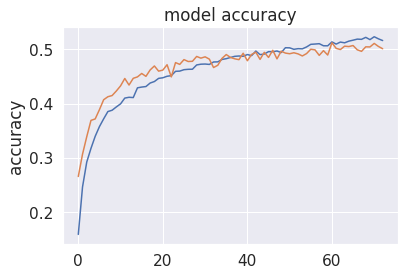

In [63]:
plt.plot(overfitting_hist.history['accuracy'])
plt.plot(overfitting_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

In [64]:
print("The total time taken for training: {}s".format(round(end_time - start_time, 2)))

The total time taken for training: 1366.61s


### 4. Model Evaluation(0.5 + 0.5 = 1 mark)

#### a. Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.

In [65]:
train_predicted = model.predict(train_gen)
valid_predicted = model.predict(valid_gen)

In [66]:
train_predicted_cls = np.argmax(train_predicted,axis=1)
valid_predicted_cls = np.argmax(valid_predicted, axis=1) 

In [67]:
train_actual_cls = np.argmax(y_train, axis=1)
valid_actual_cls = np.argmax(y_valid, axis=1)

In [68]:
print("Train Accuracy: {}%".format(accuracy_score(train_actual_cls, train_predicted_cls)))
print("Validation Accuracy: {}%".format(accuracy_score(valid_actual_cls, valid_predicted_cls)))

Train Accuracy: 0.548775%
Validation Accuracy: 0.5079%


In [69]:
cfm = confusion_matrix(valid_actual_cls, valid_predicted_cls)

In [70]:
df_cm = pd.DataFrame(cfm, index = class_names, columns=class_names)

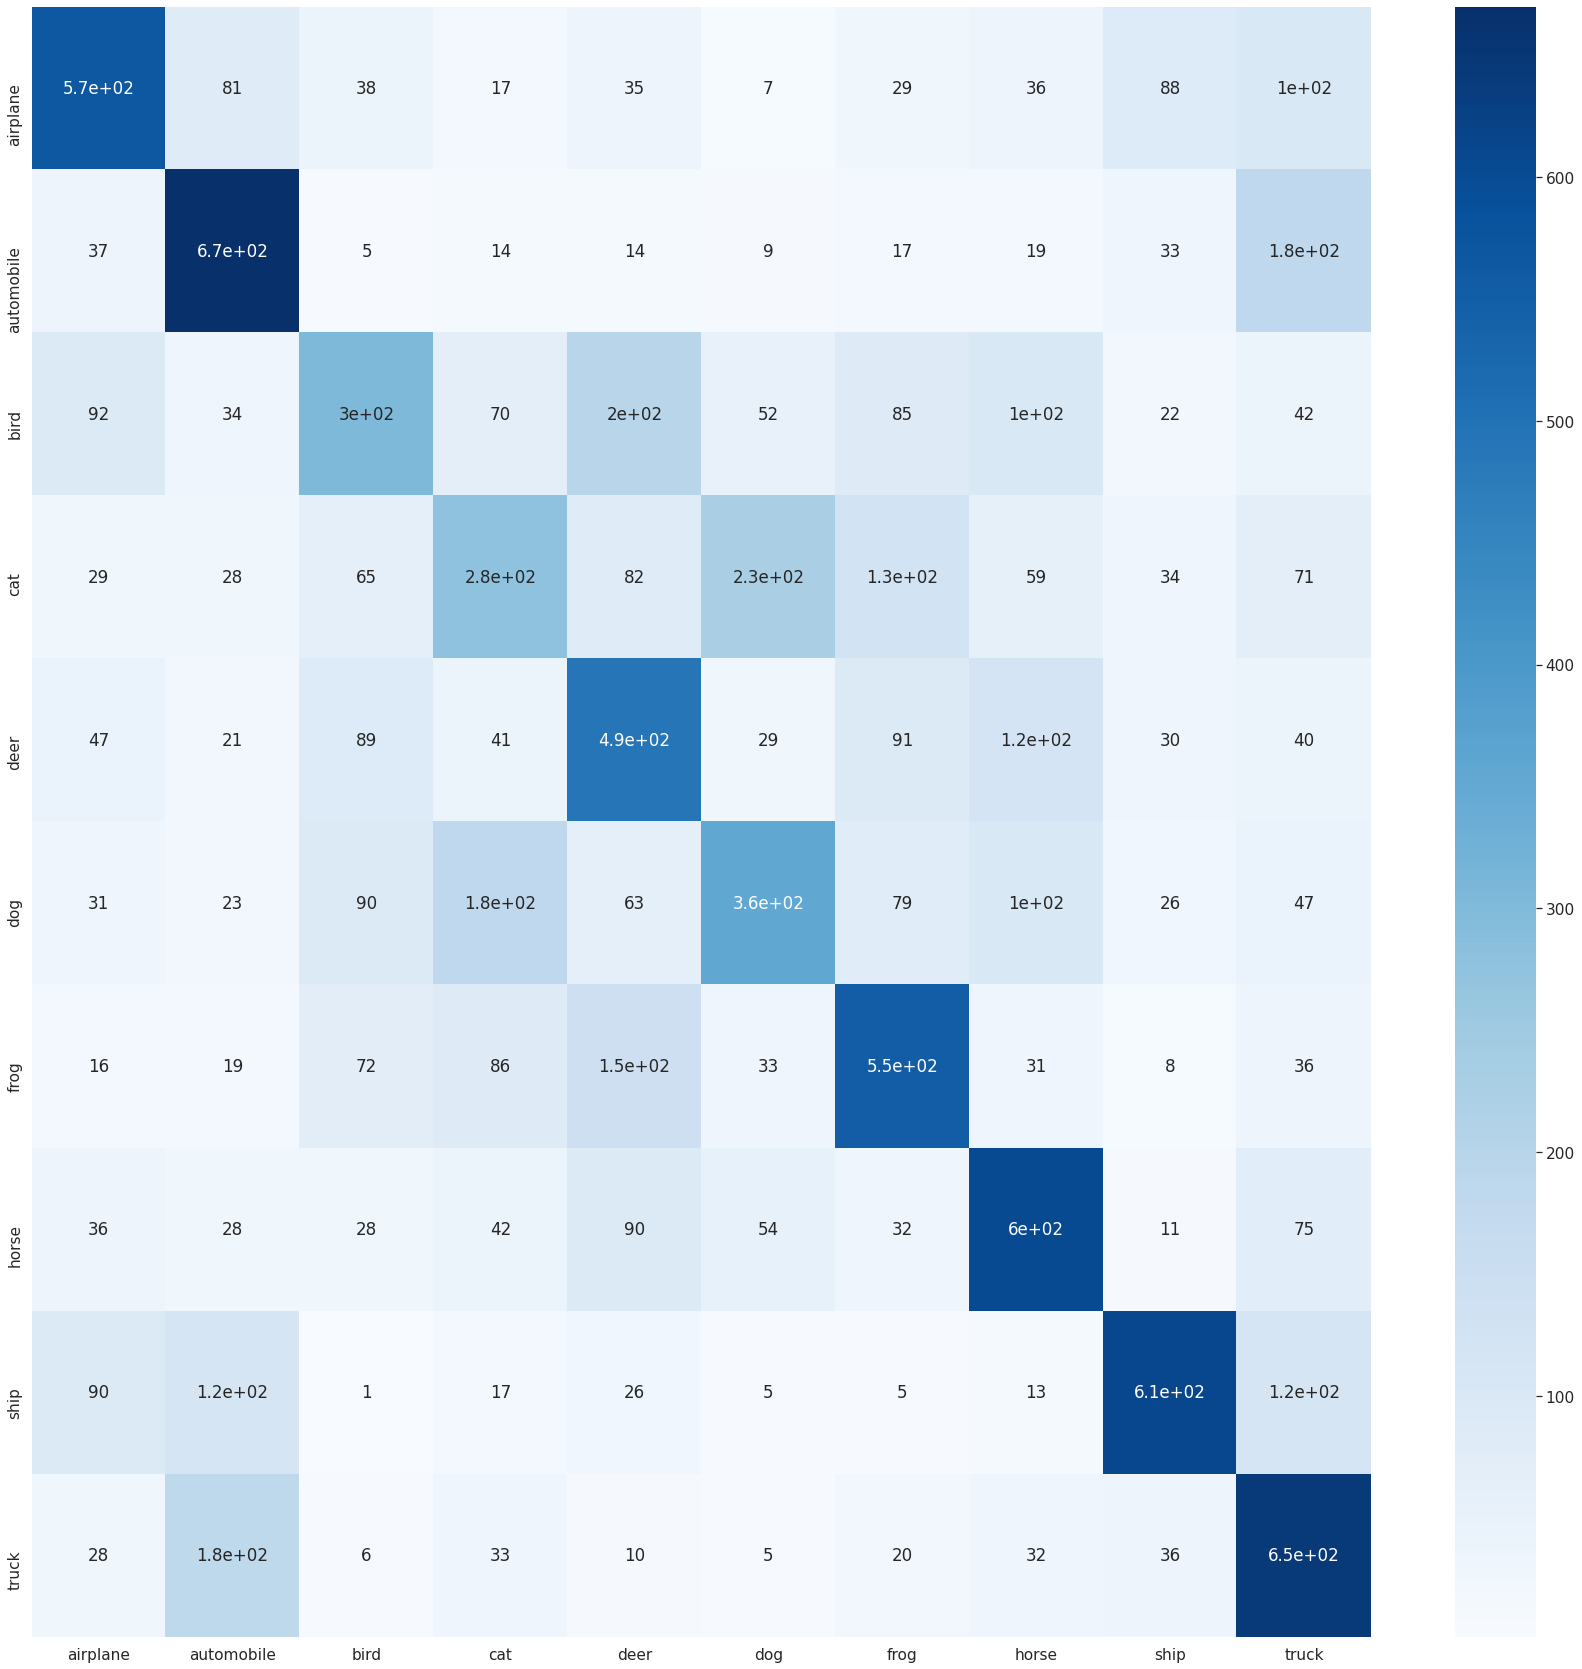

In [71]:
plt.figure(figsize=(30,30))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, cmap=plt.get_cmap('Blues')) # font size

plt.show()

# To do
Analysis of the heatmap

#### b. Print the two most incorrectly classified images for each class in the test dataset.

In [72]:
test_gen = generator.flow(X_test, y_test, batch_size=batch_size, shuffle=False)
test_predicted = model.predict(test_gen)
test_actual_cls = np.argmax(y_test, axis=1)

In [73]:
def find_2_smallest_index(arr):
    first = 999
    second = 999
    first_index=0
    sexond_index=0
    for i in range(len(arr)):
        if arr[i] < first:
            second = copy.deepcopy(first)
            second_index = copy.deepcopy(first_index)
            first = copy.deepcopy(arr[i])
            first_index = copy.deepcopy(i)
        elif (arr[i] < second):
            second = copy.deepcopy(arr[i])
            second_index = copy.deepcopy(i)
    return first_index, second_index
            

In [74]:
worst_2 = {}
for i in range(10):
    first_index, second_index = find_2_smallest_index(test_predicted[:,i])
    worst_2[i] = [X_test[first_index],X_test[second_index]]

#########################################################
  Printing top 2 worst classified images of each class   
#########################################################


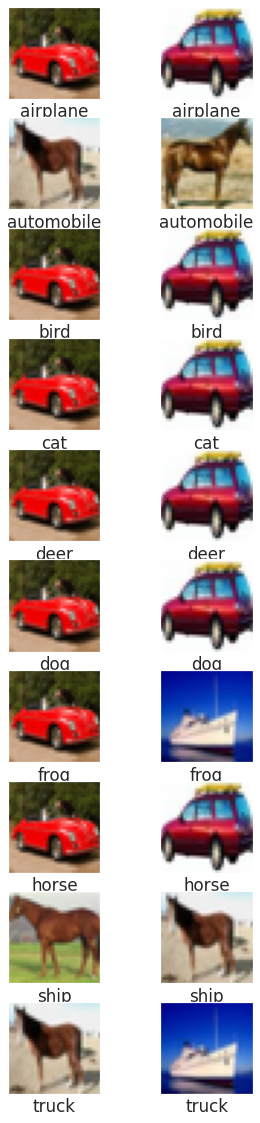

In [75]:
print("#########################################################")
print("  Printing top 2 worst classified images of each class   ")
print("#########################################################")

display_image(worst_2)

# To do
Analysis on how much the performance was affected by changing batch_size

## 2. Dropout: Change the position and value of dropout layer

We will change the position of the droput layer to just after the flatten layer to introduce noice in data and analyze model behavior and also reduce the value as we want lesser noise in the data

### 1. Model Building(0.2*5 = 1 mark)

<ol>
<li>Sequential Model layers-Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.</li>
<li>Add L2 regularization to all the layers.</li>
<li>Add one layer of dropout at the appropriate position and give reasons.</li>
<li>Choose the appropriate activation function for all the layers.</li>
<li>Print the model summary.</li>
</ol>

In [83]:
epochs = 30
nodes_per_layer = [512,256,128,64,32,16]
layers = []
batch_size = 64
dropout_rate = 0.2 # new change
num_classes = 10

In [84]:
layers.append(tf.keras.layers.Flatten(input_shape=(32,32,3)))
layers.append(tf.keras.layers.Dropout(dropout_rate)) # new change
for nodes in nodes_per_layer:
    layers.append(tf.keras.layers.Dense(nodes, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(l=0.0001))) # Using l2 regularization kernel_regularizer=tf.keras.regularizers.l2(l=0.0001)
layers.append(tf.keras.layers.Dense(10, activation=tf.keras.activations.linear, kernel_regularizer=tf.keras.regularizers.l2(l=0.0001)))
layers.append(tf.keras.layers.Softmax())
model = tf.keras.Sequential(layers)

In [85]:
# To do
Reason for placing dropout layer before last layer 

SyntaxError: ignored

In [86]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 3072)              0         
_________________________________________________________________
dense_47 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_48 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_49 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_50 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_51 (Dense)             (None, 32)               

### 2. Model Compilation(0.25 mark)
<ol>
<li>Compile the model with the appropriate loss function.</li>
<li>Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.</li>
<li>Use accuracy as a metric.</li>
</ol>

In [87]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### 3. Model Training(0.5 + 0.25 = 0.75 mark)

#### 1. Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.

In [88]:
start_time = time.time()
train_gen = generator.flow(X_train, y_train, batch_size=batch_size, shuffle=False)
valid_gen = generator.flow(X_valid, y_valid, batch_size=batch_size, shuffle=False)
overfitting_hist = model.fit(train_gen,epochs=100,validation_data=valid_gen, shuffle=False, callbacks=[callback])
end_time = time.time()

Epoch 1/100
625/625 [==============================] - 21s 32ms/step - loss: 2.2821 - accuracy: 0.1719 - val_loss: 1.9790 - val_accuracy: 0.2959
Epoch 2/100
625/625 [==============================] - 19s 31ms/step - loss: 1.9325 - accuracy: 0.3124 - val_loss: 1.8567 - val_accuracy: 0.3474
Epoch 3/100
625/625 [==============================] - 19s 31ms/step - loss: 1.8400 - accuracy: 0.3489 - val_loss: 1.7795 - val_accuracy: 0.3664
Epoch 4/100
625/625 [==============================] - 20s 31ms/step - loss: 1.7827 - accuracy: 0.3720 - val_loss: 1.7331 - val_accuracy: 0.3972
Epoch 5/100
625/625 [==============================] - 19s 31ms/step - loss: 1.7366 - accuracy: 0.3927 - val_loss: 1.6760 - val_accuracy: 0.4199
Epoch 6/100
625/625 [==============================] - 20s 31ms/step - loss: 1.7024 - accuracy: 0.4077 - val_loss: 1.6791 - val_accuracy: 0.4276
Epoch 7/100
625/625 [==============================] - 19s 31ms/step - loss: 1.6751 - accuracy: 0.4173 - val_loss: 1.6697 - val_ac

#### 2. Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training

Text(0, 0.5, 'accuracy')

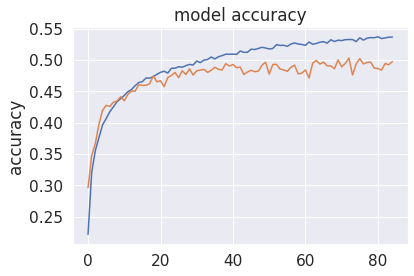

In [89]:
plt.plot(overfitting_hist.history['accuracy'])
plt.plot(overfitting_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

In [90]:
print("The total time taken for training: {}s".format(round(end_time - start_time, 2)))

The total time taken for training: 1692.93s


### 4. Model Evaluation(0.5 + 0.5 = 1 mark)

#### a. Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.

In [91]:
train_predicted = model.predict(train_gen)
valid_predicted = model.predict(valid_gen)

In [92]:
train_predicted_cls = np.argmax(train_predicted,axis=1)
valid_predicted_cls = np.argmax(valid_predicted, axis=1) 

In [93]:
train_actual_cls = np.argmax(y_train, axis=1)
valid_actual_cls = np.argmax(y_valid, axis=1)

In [94]:
print("Train Accuracy: {}%".format(accuracy_score(train_actual_cls, train_predicted_cls)))
print("Validation Accuracy: {}%".format(accuracy_score(valid_actual_cls, valid_predicted_cls)))

Train Accuracy: 0.5526%
Validation Accuracy: 0.4976%


In [95]:
cfm = confusion_matrix(valid_actual_cls, valid_predicted_cls)

In [96]:
df_cm = pd.DataFrame(cfm, index = class_names, columns=class_names)

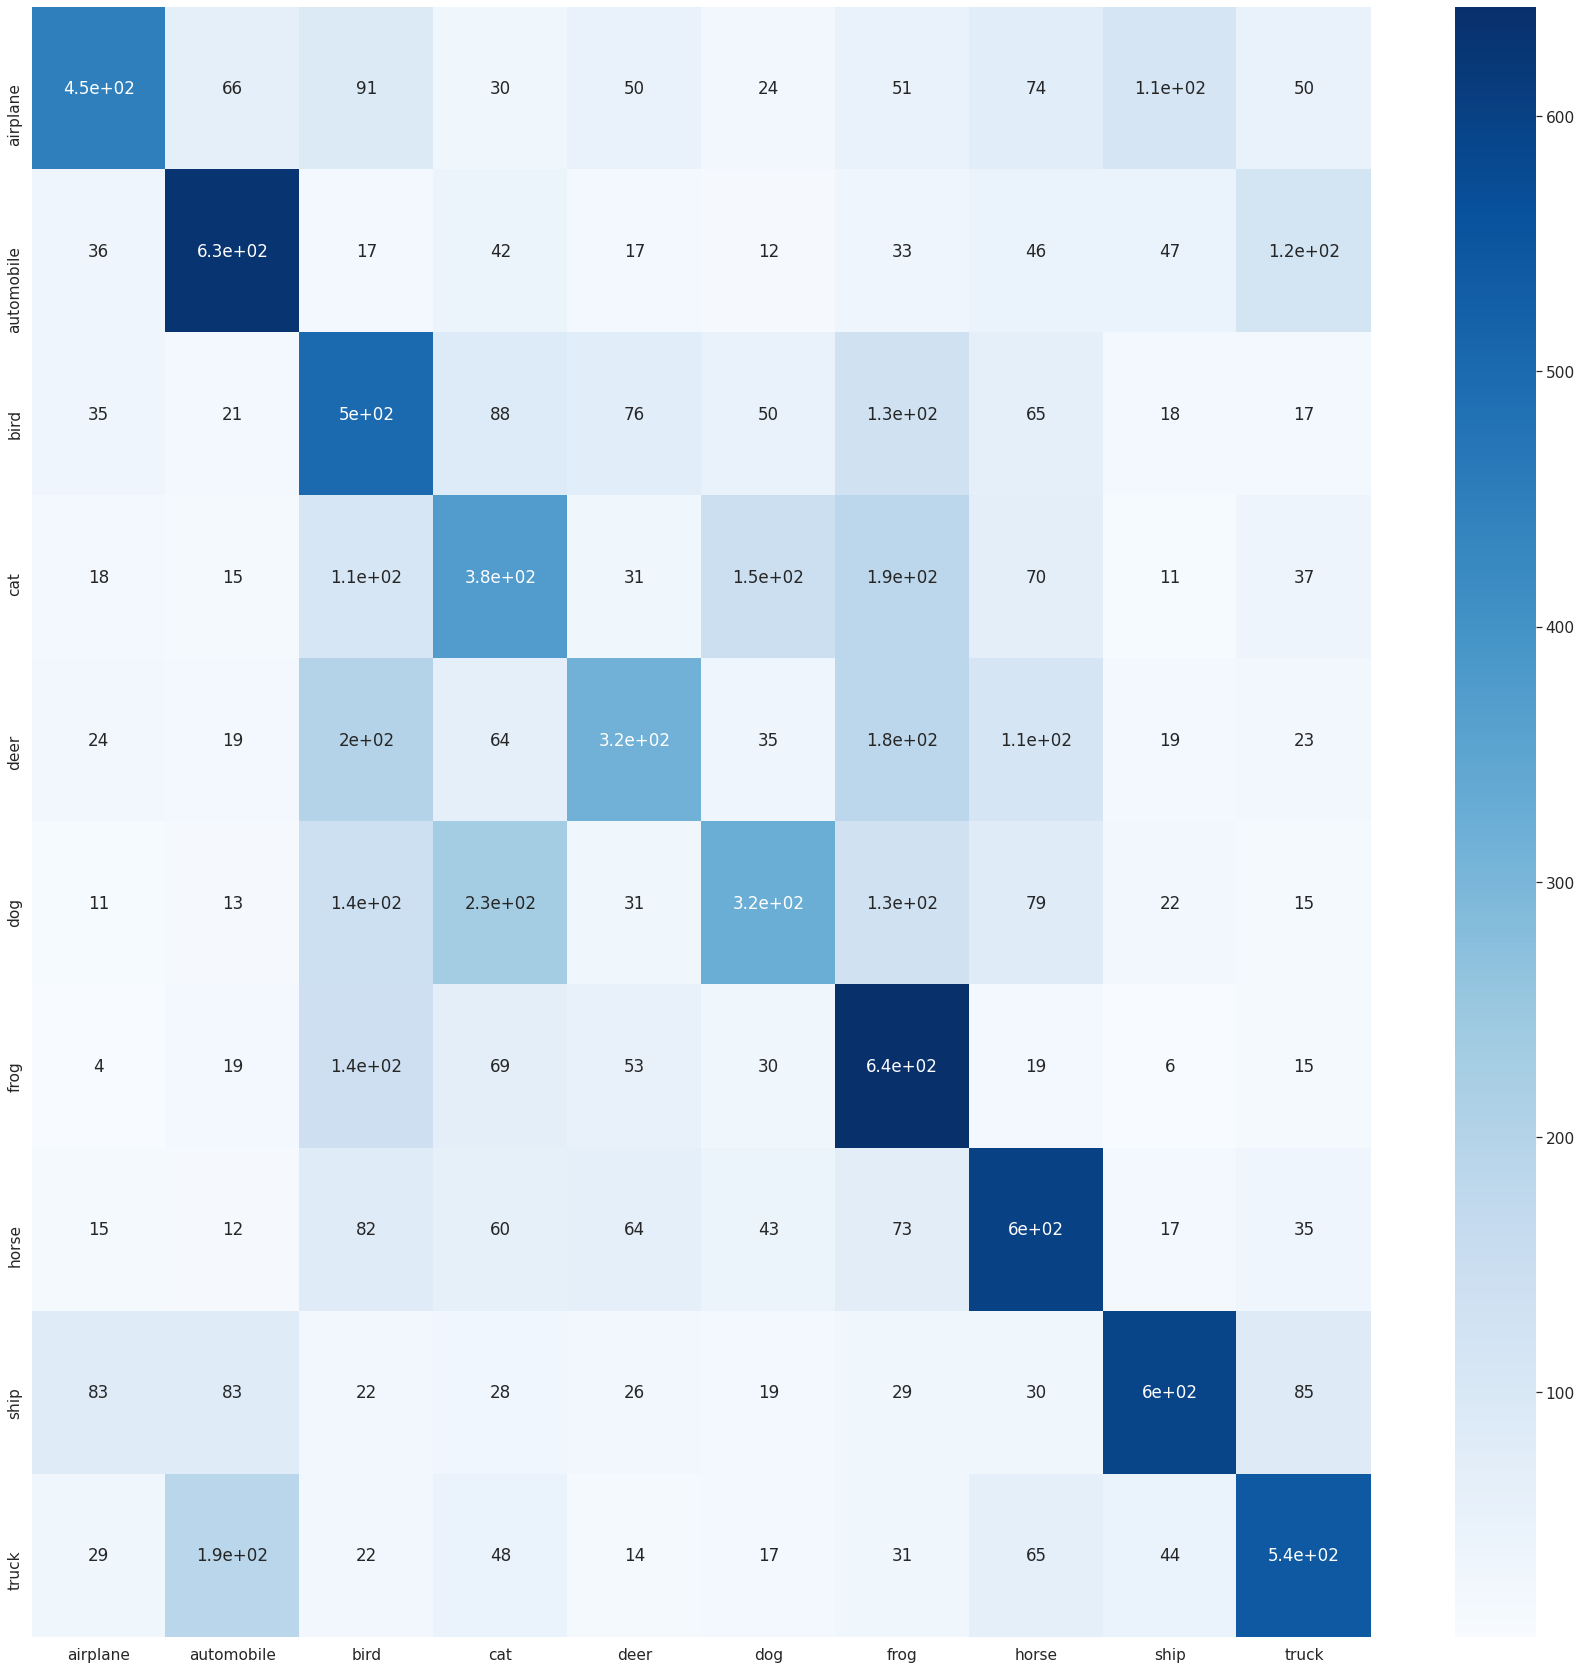

In [97]:
plt.figure(figsize=(30,30))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, cmap=plt.get_cmap('Blues')) # font size

plt.show()

# To do
Analysis of the heatmap

#### b. Print the two most incorrectly classified images for each class in the test dataset.

In [98]:
test_gen = generator.flow(X_test, y_test, batch_size=batch_size, shuffle=False)
test_predicted = model.predict(test_gen)
test_actual_cls = np.argmax(y_test, axis=1)

In [99]:
def find_2_smallest_index(arr):
    first = 999
    second = 999
    first_index=0
    sexond_index=0
    for i in range(len(arr)):
        if arr[i] < first:
            second = copy.deepcopy(first)
            second_index = copy.deepcopy(first_index)
            first = copy.deepcopy(arr[i])
            first_index = copy.deepcopy(i)
        elif (arr[i] < second):
            second = copy.deepcopy(arr[i])
            second_index = copy.deepcopy(i)
    return first_index, second_index
            

In [100]:
worst_2 = {}
for i in range(10):
    first_index, second_index = find_2_smallest_index(test_predicted[:,i])
    worst_2[i] = [X_test[first_index],X_test[second_index]]

#########################################################
  Printing top 2 worst classified images of each class   
#########################################################


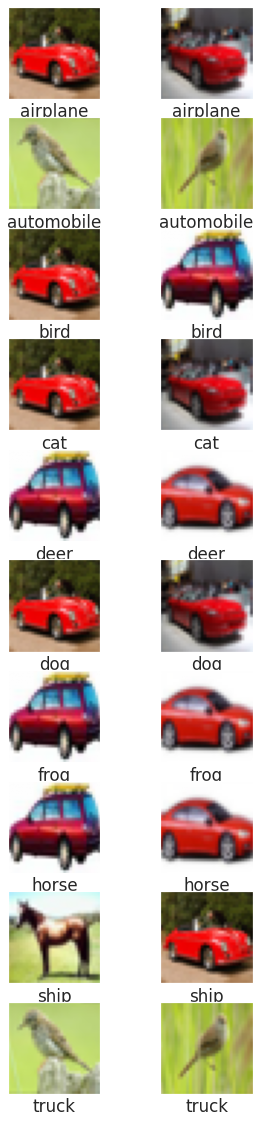

In [101]:
print("#########################################################")
print("  Printing top 2 worst classified images of each class   ")
print("#########################################################")

display_image(worst_2)

# To do
Analysis on how introducing noise in the data affects model behaviour